

# Portfolio Management- Risk Aversion Equation 



## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Data Transformation](#3.2)  
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train Test Split](#4.1)
    * [5.2. Model Evaluation- Applying Principle Component Analysis](#4.2)
        * [5.2.1. Explained Variance using PCA](#4.2.1)
        * [5.2.2. Looking at Portfolio weights](#4.2.2)
        * [5.2.3. Finding the Best Eigen Portfolio](#4.2.3)
        * [5.2.4. Backtesting Eigenportfolio](#4.2.4)

<a id='0'></a>
# 1. Problem Definition

Our goal in this case study is to maximize risk-adjusted returns using dimensionality
reduction-based algorithm on a dataset of stocks to allocate capital into different asset
classes.

The dataset used for this case study is ETFs and sotcks from Chile's roboadvisors from year 2010 onwards till 2022. The dataset can be downloaded from
yahoo finance.

https://www.soyfocus.com/


<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import scipy

<a id='1.2'></a>
## 2.2. Loading the Data

help(yf.Ticker)

In [394]:

#stocks_names = ["ITOT","IVV","QQQ","VTI","CXSE","IJR","0LMR.L","VPL","VWO","SUSA","CEMB","HYEM","MGV","USHY"]
stocks_names = ["ITOT","IVV","QQQ","VTI","IJR","VPL","VWO","SUSA","HYEM","MGV"]

In [395]:
dataset = pd.DataFrame()

In [396]:
stocks = []
for s in stocks_names:
    value = yf.Ticker(s).history(period = "10y").Close
    dat = pd.DataFrame({"{}".format(s): value})
    dataset = pd.concat([dataset,dat],axis = 1)

In [560]:
test = yf.Ticker("QQQ").history(start='2019-01-01', end='2019-01-06')

In [561]:
test

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,147.110,151.748,147.003,150.900,58576700,0,0
2019-01-03,148.679,149.322,145.649,145.970,74820200,0,0
2019-01-04,148.425,152.966,147.841,152.215,74709300,0,0


In [551]:
dataset["QQQ"]

Date
2012-12-21     59.498
2012-12-24     59.379
2012-12-26     58.859
2012-12-27     58.768
2012-12-28     58.202
               ...   
2022-12-14    285.826
2022-12-15    276.229
2022-12-16    273.595
2022-12-19    269.750
2022-12-20    269.540
Name: QQQ, Length: 2517, dtype: float64

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [397]:
# shape
dataset.shape

(2518, 10)

In [398]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,ITOT,IVV,QQQ,VTI,IJR,VPL,VWO,SUSA,HYEM,MGV
Date,,,,,,,,,,
2012-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-21,26.920,119.169,59.498,61.588,33.990,40.663,32.723,25.909,14.857,33.593
2012-12-24,26.866,118.796,59.379,61.378,33.859,40.556,32.655,25.818,14.857,33.444
2012-12-26,26.717,118.239,58.859,61.084,33.563,40.571,32.738,25.723,14.890,33.405
2012-12-27,26.709,118.123,58.768,61.034,33.598,40.701,32.971,25.546,14.886,33.311


In [399]:
# describe data
set_option('precision', 3)
dataset.describe()

,ITOT,IVV,QQQ,VTI,IJR,VPL,VWO,SUSA,HYEM,MGV
count,2517.000,2517.000,2517.000,2517.000,2517.000,2517.000,2517.000,2517.000,2517.000,2517.000
mean,57.824,255.179,174.594,131.038,68.397,57.093,36.383,54.646,17.509,65.787
std,21.179,94.426,93.963,47.844,21.208,10.380,6.220,21.005,2.207,19.771
min,26.411,116.786,58.202,60.371,33.372,40.479,23.429,25.394,13.777,32.911
25%,40.774,179.527,99.996,92.488,50.208,47.796,31.904,37.947,15.404,49.350
50%,54.062,237.316,150.288,122.018,65.274,56.923,35.267,50.102,17.581,64.454
75%,70.426,313.118,240.475,159.359,79.695,63.353,39.751,66.550,19.032,75.455
max,105.942,472.277,400.528,240.230,117.894,81.423,52.909,105.120,21.911,107.723


**Obs**
Not all rows have the same number of data, this means that there are null o NAN values filled in. To do afair comparions we have to deal with them

<a id='2.2'></a>
## 3.2. Data Visualization

Taking a look at the correlation. More detailed look at the data will be performed after implementing the Dimensionality Reduction Models.

<AxesSubplot:title={'center':'Correlation Matrix'}>

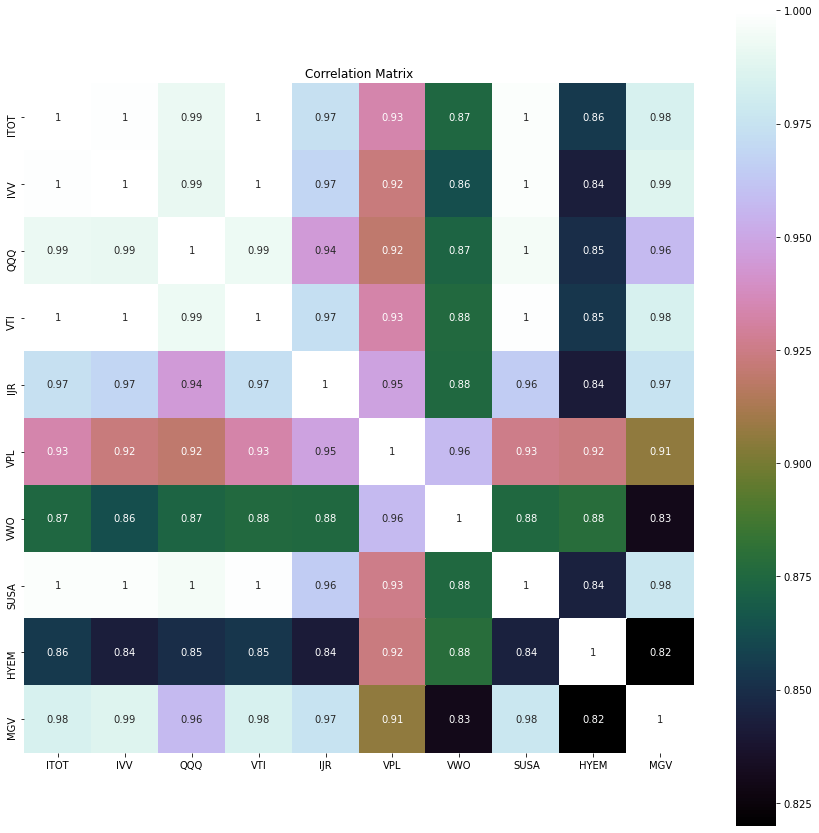

In [400]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As it can be seen by the chart above, there is a significant positive correlation between
the stocks. 

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Let us check for the NAs in the rows, either drop them or fill them with the mean of the column

In [401]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


Getting rid of the columns with more than 30% missing values. 

In [402]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(2518, 10)

Given that there are null values drop the rown contianing the null values.

In [403]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')

# Drop the rows containing NA
dataset= dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

dataset.head(2)

,ITOT,IVV,QQQ,VTI,IJR,VPL,VWO,SUSA,HYEM,MGV
Date,,,,,,,,,,
2012-12-21,26.920,119.169,59.498,61.588,33.990,40.663,32.723,25.909,14.857,33.593
2012-12-24,26.866,118.796,59.379,61.378,33.859,40.556,32.655,25.818,14.857,33.444


In [674]:
#percentage = int(len(dataset) * 0.7)
dataset_train = dataset[761:1715]
dataset_test = dataset[1715:]


In [675]:
dataset_train.index[0]

Timestamp('2015-12-31 00:00:00')

# Analysis

In [676]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage,risk_matrix

from pypfopt import plotting
import copy

In [704]:
mu = mean_historical_return(dataset_train,compounding = False)
#S = CovarianceShrinkage(dataset).ledoit_wolf()
S = risk_matrix(dataset_train)#.sample_cov()

In [678]:
dataset_train.iloc[100:]

,ITOT,IVV,QQQ,VTI,IJR,VPL,VWO,SUSA,HYEM,MGV
Date,,,,,,,,,,
2016-05-25,42.261,185.732,103.742,95.422,52.027,46.310,27.538,39.222,15.936,51.545
2016-05-26,42.247,185.802,104.046,95.404,52.000,46.319,27.719,39.195,15.902,51.469
2016-05-27,42.456,186.571,104.588,95.832,52.463,46.277,27.711,39.308,15.861,51.697
2016-05-31,42.443,186.279,104.787,95.788,52.563,46.509,27.785,39.407,15.868,51.596
2016-06-01,42.500,186.632,104.797,96.046,52.945,46.443,27.760,39.448,15.900,51.722
...,...,...,...,...,...,...,...,...,...,...
2019-10-09,62.432,277.251,183.524,141.210,71.631,59.670,36.295,57.584,19.334,72.976
2019-10-10,62.802,279.211,184.945,142.116,71.802,59.870,36.684,57.976,19.326,73.494
2019-10-11,63.552,281.994,187.327,143.642,73.115,60.535,37.172,58.789,19.334,74.151


In [705]:
np.mean(dataset_train.pct_change(1))*252

ITOT    0.126
IVV     0.128
QQQ     0.169
VTI     0.127
IJR     0.117
VPL     0.079
VWO     0.103
SUSA    0.129
HYEM    0.071
MGV     0.117
dtype: float64

In [706]:
S

,ITOT,IVV,QQQ,VTI,IJR,VPL,VWO,SUSA,HYEM,MGV
ITOT,0.017,0.017,0.021,0.017,0.019,0.015,0.018,0.017,0.002,0.016
IVV,0.017,0.017,0.021,0.017,0.018,0.015,0.017,0.017,0.002,0.016
QQQ,0.021,0.021,0.030,0.021,0.021,0.018,0.022,0.021,0.003,0.018
VTI,0.017,0.017,0.021,0.017,0.019,0.015,0.018,0.017,0.002,0.016
IJR,0.019,0.018,0.021,0.019,0.027,0.016,0.019,0.018,0.002,0.017
VPL,0.015,0.015,0.018,0.015,0.016,0.019,0.020,0.014,0.003,0.013
VWO,0.018,0.017,0.022,0.018,0.019,0.020,0.031,0.017,0.004,0.016
SUSA,0.017,0.017,0.021,0.017,0.018,0.014,0.017,0.018,0.002,0.016
HYEM,0.002,0.002,0.003,0.002,0.002,0.003,0.004,0.002,0.003,0.002
MGV,0.016,0.016,0.018,0.016,0.017,0.013,0.016,0.016,0.002,0.015


$$
\mathcal{L} = \bar{x}^T \mu \mathbf{S} \bar{x}  - \mathbf{R}  x\\
\sum x = 1 \\
 x_{i} > 0 
$$

## Max Sharpe Ratio

Expected annual return: 8.3%
Annual volatility: 5.5%
Sharpe Ratio: 1.51


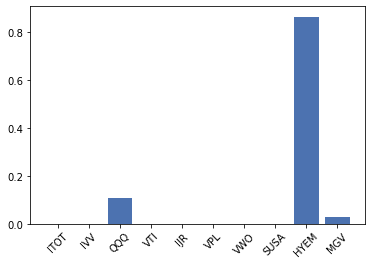

In [683]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe(risk_free_rate = 0)
ef.portfolio_performance(risk_free_rate= 0,verbose=True)

w_k, w_v = [],[]
for k in weights.keys():
    w_k.append(k)
    w_v.append(weights[k])
    
plt.bar(w_k,w_v)
plt.xticks(rotation = 45);

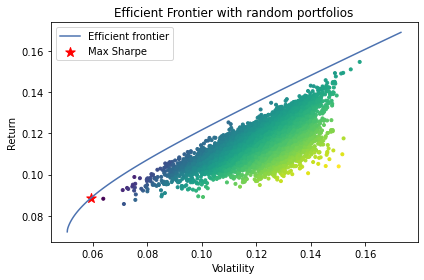

In [684]:
ef = EfficientFrontier(mu, S)

weights = ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")


# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
#plt.savefig("ef_scatter.png", dpi=200)
plt.show()

### Backtest

In [685]:
ret_test_SR = np.dot(dataset_test.loc[:, weights.keys()], np.array(list(weights.values())))

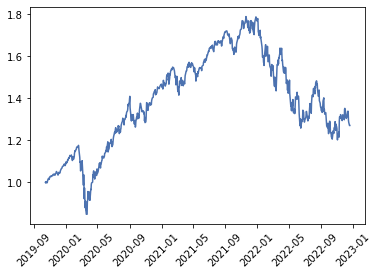

In [686]:
plt.plot(dataset_test.index,ret_test_SR/ret_test_SR[0])
plt.xticks(rotation = 45);

## Max utility given risk aversion

Expected annual return: 16.9%
Annual volatility: 17.3%
Sharpe Ratio: 0.86


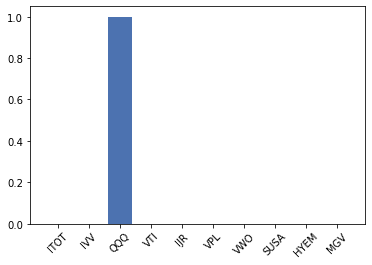

In [687]:
ef = EfficientFrontier(mu, S)
weights = ef.max_quadratic_utility(risk_aversion=0.001)
ef.portfolio_performance(verbose=True)

w_k, w_v = [],[]
for k in weights.keys():
    w_k.append(k)
    w_v.append(weights[k])

plt.bar(w_k,w_v)
plt.xticks(rotation = 45);

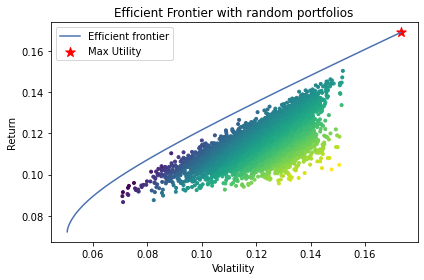

In [688]:
ef = EfficientFrontier(mu, S)

weights = ef.max_quadratic_utility(0.1)
ret_tangent, std_tangent, _ = ef.portfolio_performance()

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Utility")

n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")


# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
#plt.savefig("ef_scatter.png", dpi=200)
plt.show()

### Backtest

In [689]:
ret_test_MU = np.dot(dataset_test.loc[:, weights.keys()], np.array(list(weights.values())))

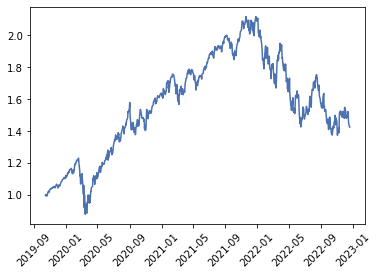

In [690]:
plt.plot(dataset_test.index,ret_test_MU/ret_test_MU[0])
plt.xticks(rotation = 45);

## Max Return given Risk

$$
\text{max} R[w]\\
w S w < \mu
$$

In [698]:
help(ef.efficient_risk)

Help on method efficient_risk in module pypfopt.efficient_frontier.efficient_frontier:

efficient_risk(target_volatility, market_neutral=False) method of pypfopt.efficient_frontier.efficient_frontier.EfficientFrontier instance
    Maximise return for a target risk. The resulting portfolio will have a volatility
    less than the target (but not guaranteed to be equal).
    
    :param target_volatility: the desired maximum volatility of the resulting portfolio.
    :type target_volatility: float
    :param market_neutral: whether the portfolio should be market neutral (weights sum to zero),
                           defaults to False. Requires negative lower weight bound.
    :param market_neutral: bool, optional
    :raises ValueError: if ``target_volatility`` is not a positive float
    :raises ValueError: if no portfolio can be found with volatility equal to ``target_volatility``
    :raises ValueError: if ``risk_free_rate`` is non-numeric
    :return: asset weights for the efficie

Expected annual return: 8.1%
Annual volatility: 5.4%
Sharpe Ratio: 1.14


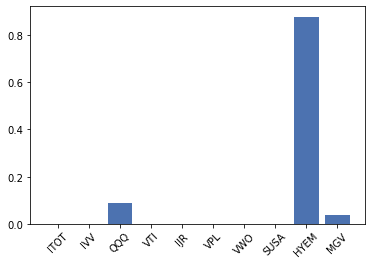

In [730]:
ef = EfficientFrontier(mu, S)
risk = np.sqrt(0.0029)

weights = ef.efficient_risk(risk)
ef.portfolio_performance(verbose=True)

w_k, w_v = [],[]
for k in weights.keys():
    w_k.append(k)
    w_v.append(weights[k])
    
plt.bar(w_k,w_v)
plt.xticks(rotation = 45);

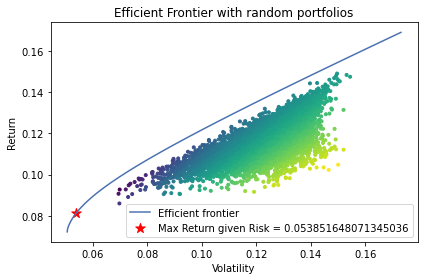

In [731]:
ef = EfficientFrontier(mu, S)

weights = ef.efficient_risk(risk)
ret_tangent, std_tangent, _ = ef.portfolio_performance()

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Return given Risk = {}".format(risk))

n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")


# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
#plt.savefig("ef_scatter.png", dpi=200)
plt.show()

### Backtest

In [732]:
ret_test_MR = np.dot(dataset_test.loc[:, weights.keys()], np.array(list(weights.values())))

1.1937659426494205


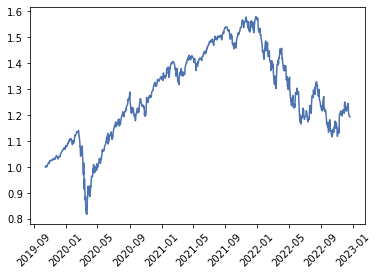

In [733]:
plt.plot(dataset_test.index,ret_test_MR/ret_test_MR[0])
plt.xticks(rotation = 45);
print(ret_test_MR[-1]/ret_test_MR[0])

## Min Volatility given Return

In [695]:
help(ef.efficient_return)

Help on method efficient_return in module pypfopt.efficient_frontier.efficient_frontier:

efficient_return(target_return, market_neutral=False) method of pypfopt.efficient_frontier.efficient_frontier.EfficientFrontier instance
    Calculate the 'Markowitz portfolio', minimising volatility for a given target return.
    
    :param target_return: the desired return of the resulting portfolio.
    :type target_return: float
    :param market_neutral: whether the portfolio should be market neutral (weights sum to zero),
                           defaults to False. Requires negative lower weight bound.
    :type market_neutral: bool, optional
    :raises ValueError: if ``target_return`` is not a positive float
    :raises ValueError: if no portfolio can be found with return equal to ``target_return``
    :return: asset weights for the Markowitz portfolio
    :rtype: OrderedDict



Expected annual return: 12.0%
Annual volatility: 9.4%
Sharpe Ratio: 1.07


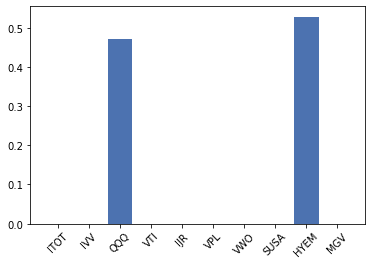

In [638]:
ef = EfficientFrontier(mu, S)
ret = 0.12
weights = ef.efficient_return(target_return =ret)
ef.portfolio_performance(verbose=True)

w_k, w_v = [],[]
for k in weights.keys():
    w_k.append(k)
    w_v.append(weights[k])
    
plt.bar(w_k,w_v)
plt.xticks(rotation = 45);
                              


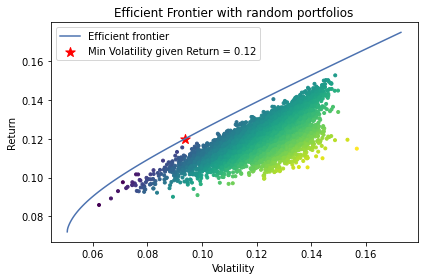

In [639]:
ef = EfficientFrontier(mu, S)

weights = ef.efficient_return(target_return =ret)
ret_tangent, std_tangent, _ = ef.portfolio_performance()

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility given Return = {}".format(ret))

n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")


# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
#plt.savefig("ef_scatter.png", dpi=200)
plt.show()

### Backtest

In [640]:
ret_test_MV = np.dot(dataset_test.loc[:, weights.keys()], np.array(list(weights.values())))

In [641]:
dataset_test.index[-1]

Timestamp('2022-12-20 00:00:00')

1.3753988723379733


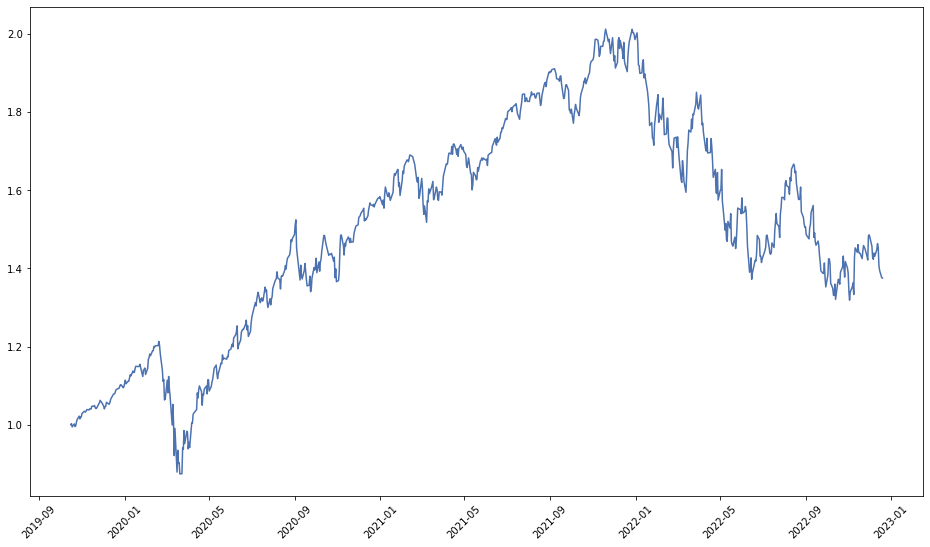

In [644]:
plt.figure(figsize = (16,9))

plt.plot(dataset_test.index,ret_test_MV/ret_test_MV[0])
plt.xticks(rotation = 45);
print(ret_test_MV[-1]/ret_test_MV[0])

# All together

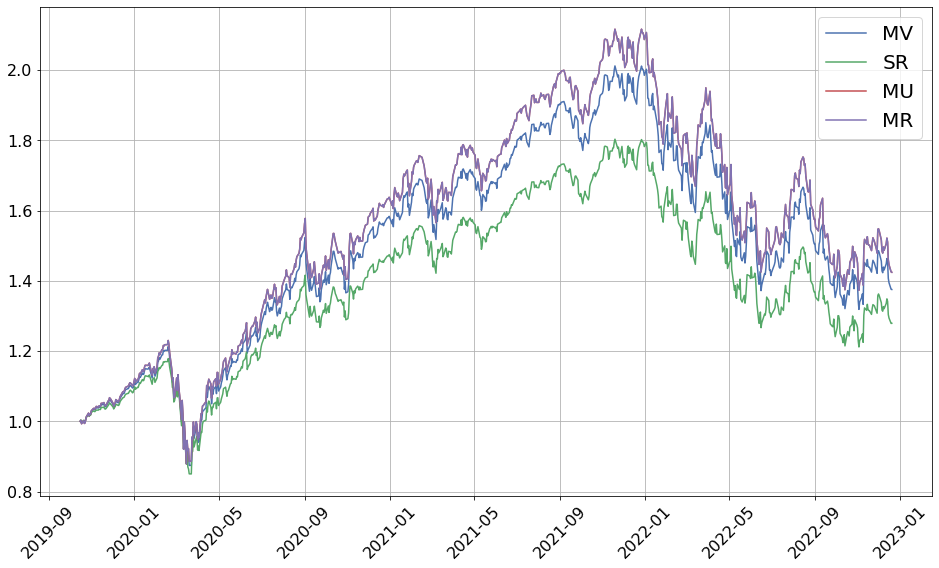

In [645]:
plt.figure(figsize = (16,9))

plt.plot(dataset_test.index,ret_test_MV/ret_test_MV[0],label = "MV")
plt.plot(dataset_test.index,ret_test_SR/ret_test_SR[0],label = "SR")
plt.plot(dataset_test.index,ret_test_MU/ret_test_MU[0],label = "MU")
plt.plot(dataset_test.index,ret_test_MR/ret_test_MR[0],label = "MR")
plt.legend(fontsize = 20)
plt.xticks(fontsize = 16,rotation = 45);
plt.yticks(fontsize = 16);
plt.grid()